In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv("house-prices.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [99]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [101]:
df["mainroad"]=df.mainroad.map({"yes":1,"no":0})

In [102]:
df.mainroad.dtypes

dtype('int64')

In [103]:
df["guestroom"]=df.guestroom.map({"yes":1,"no":0})
df["basement"]=df.basement.map({"yes":1,"no":0})
df["hotwaterheating"]=df.hotwaterheating.map({"yes":1,"no":0})
df["airconditioning"]=df.airconditioning.map({"yes":1,"no":0})
df["prefarea"]=df.prefarea.map({"yes":1,"no":0})

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [105]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [106]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['furnishingstatus']=le.fit_transform(df["furnishingstatus"])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int32
dtypes: int32(1), int64(12)
memory usage: 53.3 KB


In [108]:
df.furnishingstatus.unique()

array([0, 1, 2])

In [109]:
X=df.drop(["price"],axis=1)
y=df["price"]

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33,random_state=42)


In [111]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [113]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("For train set:")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")

print("For test set:")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")

For train set:
R-squared: 0.686
MSE: 971946527815.664
RMSE : 985873.485
MAE: 720751.213
For test set:
R-squared: 0.656
MSE: 1475542475754.551
RMSE : 1214719.093
MAE: 906953.791


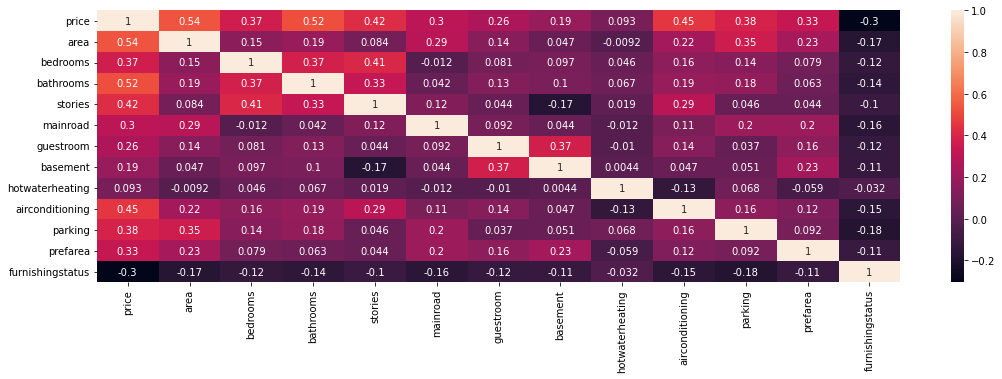

In [114]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_train_sm= sm.add_constant(X_train)

vif=pd.DataFrame()
vif["Features"]=X_train_sm.columns
vif["VIF"]= [variance_inflation_factor(X_train_sm.values, index) for index in range(X_train_sm.shape[1])]
vif

C:\Users\ADNAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
0,const,32.478145
1,area,1.328102
2,bedrooms,1.418553
3,bathrooms,1.295710
4,stories,1.541964
5,mainroad,1.181044
6,guestroom,1.294835
7,basement,1.446356
8,hotwaterheating,1.055177
9,airconditioning,1.267266


C:\Users\ADNAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


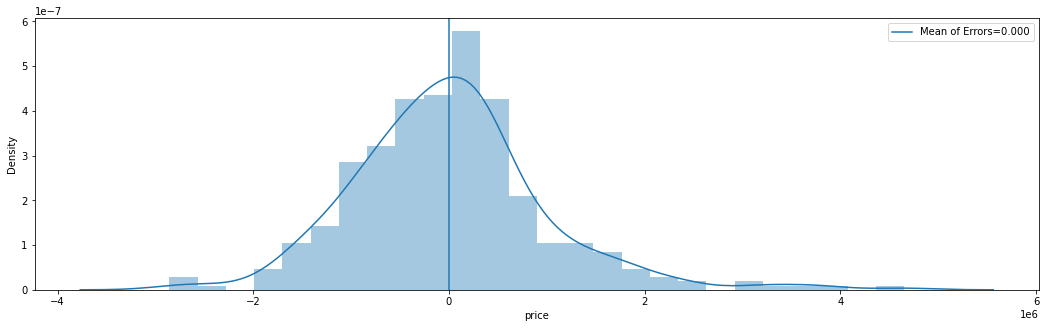

In [116]:
errors_train= y_train - y_train_pred
plt.figure(figsize=(18,5))
sns.distplot(errors_train)
plt.axvline(errors_train.mean(), label=f"Mean of Errors={errors_train.mean():.3f}")
plt.legend()
plt.show()

C:\Users\ADNAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


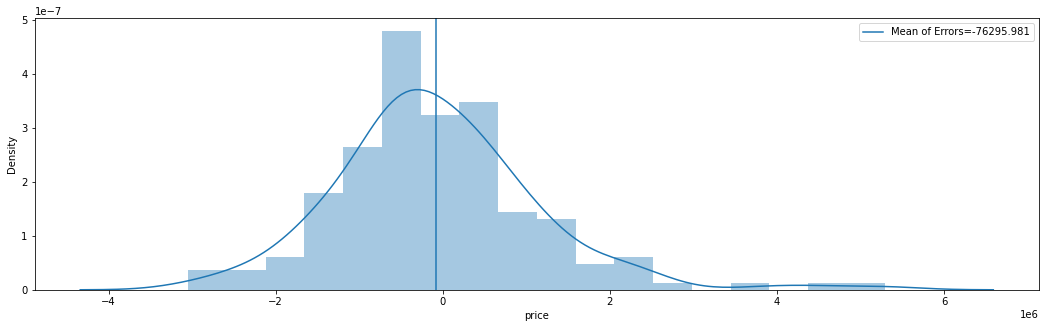

In [117]:
errors_test= y_test - y_test_pred
plt.figure(figsize=(18,5))
sns.distplot(errors_test)
plt.axvline(errors_test.mean(), label=f"Mean of Errors={errors_test.mean():.3f}")
plt.legend()
plt.show()

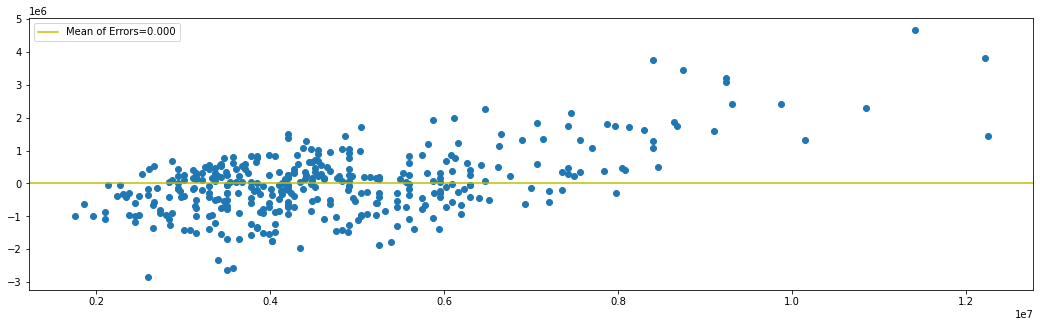

In [118]:
plt.figure(figsize=(18,5))
plt.scatter(y_train,errors_train)
plt.axhline(errors_train.mean(), color="y", label=f"Mean of Errors={errors_train.mean():.3f}")
plt.legend()
plt.show()